In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

# Season Dataset (Version 4)
In this version, we will have similar `month, day` rule to the one in version 3 and in `y_rule2`. That is,

- Spring: 15th March to 14th June (inclusive)
- Summer: 15th June to 14th September
- Autumn: 15th September to 14th December
- Winter: 15th December to 14th March

In addition to that, we have added `latitude, longitude` features to separate the Earth into Northern/Southern semispheres,
whose seaon should be the opposite.

Besides, from this notebook on, I have decided not to use ensemble-method classifiers (e.g. random forest), to better see what single classifiers can achieve and to better make comparison.

In [3]:
from constants import *
from utils import *

We need a few tools to build this larger dataset with new features `latitud, longitude`.

In [4]:
import collections

In [5]:
list(zip(range(3), range(4, 4+3), range(-10-3, -10)))

[(0, 4, -13), (1, 5, -12), (2, 6, -11)]

In [6]:
import itertools

In [7]:
list(itertools.product(range(3), range(4, 4+3), range(-10-3, -10)))

[(0, 4, -13),
 (0, 4, -12),
 (0, 4, -11),
 (0, 5, -13),
 (0, 5, -12),
 (0, 5, -11),
 (0, 6, -13),
 (0, 6, -12),
 (0, 6, -11),
 (1, 4, -13),
 (1, 4, -12),
 (1, 4, -11),
 (1, 5, -13),
 (1, 5, -12),
 (1, 5, -11),
 (1, 6, -13),
 (1, 6, -12),
 (1, 6, -11),
 (2, 4, -13),
 (2, 4, -12),
 (2, 4, -11),
 (2, 5, -13),
 (2, 5, -12),
 (2, 5, -11),
 (2, 6, -13),
 (2, 6, -12),
 (2, 6, -11)]

In [10]:
import pandas as pd

In [11]:
df_date = pd.DataFrame(
    L_month_day,
    columns=["month", "day"]
)
df_date.head()

,month,day
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [12]:
df_geo = pd.DataFrame(
    itertools.product(latitudes, longitudes),
    columns=["latitude", "longitude"],
)
df_geo

,latitude,longitude
0,-89,-179
1,-89,-178
2,-89,-177
3,-89,-176
4,-89,-175
...,...,...
64435,89,176
64436,89,177
64437,89,178
64438,89,179


View or copy? (Pandas)

In [13]:
np.all(df_date["month"] == df_date.loc[:, "month"])

True

In [14]:
df_date["month"] is df_date.loc[:, "month"]

True

Seems that both of them give **view**.

In [15]:
date_split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=SEED)
geo_split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=SEED)
for date_train_indices, date_test_indices in date_split.split(df_date, df_date["month"]):
    pass
#for geo_train_indices, geo_test_indices in geo_split.split(df_geo, df_geo["longitude"]):
for geo_train_indices, geo_test_indices in geo_split.split(df_geo, df_geo["latitude"]):
    pass

print(f"date_test_indices = {date_test_indices}")
print(f"geo_test_indices = {geo_test_indices}")

date_test_indices = [ 95 255 146 339 152  93 349  27 264 127  87 136 260  36 156 230  50 253
 257 205 222  73 211 238  19 128 358 319 299 101 111 302   5 213 310 151
 174  45 321 138 282  43  20 194 229 361 326 242 313 274 108 208  57  76
 132 116 311 297 240 179 280  10 243 209 184  79 173 350  37  63  74 344
   6]
geo_test_indices = [  550 44755 15477 ... 51936   457 58417]


In [16]:
type(geo_test_indices)

numpy.ndarray

In [17]:
date_test_indices

array([ 95, 255, 146, 339, 152,  93, 349,  27, 264, 127,  87, 136, 260,
        36, 156, 230,  50, 253, 257, 205, 222,  73, 211, 238,  19, 128,
       358, 319, 299, 101, 111, 302,   5, 213, 310, 151, 174,  45, 321,
       138, 282,  43,  20, 194, 229, 361, 326, 242, 313, 274, 108, 208,
        57,  76, 132, 116, 311, 297, 240, 179, 280,  10, 243, 209, 184,
        79, 173, 350,  37,  63,  74, 344,   6])

In [18]:
print(f"df_date.iloc[date_test_indices]['month'].value_counts() =\n{df_date.iloc[date_test_indices]['month'].value_counts()}")
print()
print(f"df_geo.iloc[geo_test_indices]['latitude'].value_counts() =\n{df_geo.iloc[geo_test_indices]['latitude'].value_counts()}")

df_date.iloc[date_test_indices]['month'].value_counts() =
8     7
1     6
2     6
3     6
4     6
5     6
6     6
7     6
9     6
10    6
11    6
12    6
Name: month, dtype: int64

df_geo.iloc[geo_test_indices]['latitude'].value_counts() =
 0     72
-2     72
-11    72
 13    72
-19    72
       ..
-62    72
 66    72
-70    72
 74    72
-89    72
Name: latitude, Length: 179, dtype: int64


In [19]:
df1 = pd.DataFrame({'col1': [1,2], 'col2': [3,4]})
df2 = pd.DataFrame({'col3': [5,6]})    

df1.merge(df2, how='cross')

,col1,col2,col3
0,1,3,5
1,1,3,6
2,2,4,5
3,2,4,6


In [20]:
df_train = pd.merge(
    df_date.iloc[date_train_indices],
    df_geo.iloc[geo_train_indices],
    how="cross",
)
df_train

,month,day,latitude,longitude
0,11,25,-87,16
1,11,25,24,60
2,11,25,-84,165
3,11,25,83,8
4,11,25,-55,71
...,...,...,...,...
15053179,3,12,-89,97
15053180,3,12,25,103
15053181,3,12,78,34
15053182,3,12,-46,107


In [21]:
df_test = pd.merge(
    df_date.iloc[date_test_indices],
    df_geo.iloc[geo_test_indices],
    how="cross",
)
df_test

,month,day,latitude,longitude
0,4,6,-88,11
1,4,6,35,-64
2,4,6,-47,178
3,4,6,9,-139
4,4,6,-73,-60
...,...,...,...,...
940819,1,7,-71,-144
940820,1,7,39,-130
940821,1,7,55,-83
940822,1,7,-88,-82


In [22]:
df3 = pd.DataFrame({
    'item': ['refrigerator', 'fan', 'laptop', 'light_bulb'],
    'price': [10000, 5000, 15000, 2000],
})
df3

,item,price
0,refrigerator,10000
1,fan,5000
2,laptop,15000
3,light_bulb,2000


In [23]:
discount = 0.1
df3['discounted'] = df3.apply(
    lambda row: int(row.price * (1 - discount)),
    axis = 1,
)
df3

,item,price,discounted
0,refrigerator,10000,9000
1,fan,5000,4500
2,laptop,15000,13500
3,light_bulb,2000,1800


In [24]:
%%time
y_rule3_train = df_train.apply(rule3, axis=1).values
y_rule3_train

CPU times: user 5min 3s, sys: 891 ms, total: 5min 4s
Wall time: 5min 4s


array([0, 2, 0, ..., 3, 1, 1])

**(?)** The above cell takes a long time to finish. Any way to accelerate it?<br>

In [25]:
%%time
y_rule3_test = df_test.apply(rule3, axis=1).values
y_rule3_test

CPU times: user 19 s, sys: 42.5 ms, total: 19 s
Wall time: 19 s


array([2, 0, 2, ..., 3, 1, 3])

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [47]:
log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
#svm_clf = SVC(probability=True)
svm_clf = SVC()
#rnd_clf = RandomForestClassifier()
sgd_clf = SGDClassifier(random_state=SEED)
gnb_clf = GaussianNB()
#mnb_clf = MultinomialNB()
#cnb_clf = ComplementNB()

T_classifiers = (
    log_clf,
    tree_clf,
    #svm_clf,
    sgd_clf,
    gnb_clf,
    #mnb_clf,
    #cnb_clf,
)

I have commented out `svm_clf` because it takes too long for it to train (sth like more than 2 hours on Aero.)

In [48]:
%%time
for clf in T_classifiers:
    clf.fit(df_train, y_rule3_train)
    #clf.fit(df_train, df_y_rule3_train)
    y_pred = clf.predict(df_test)

    acc = accuracy_score(y_rule3_test, y_pred)
    precision = precision_score(y_rule3_test, y_pred, average="weighted")
    recall = recall_score(y_rule3_test, y_pred, average="weighted")

    print(f"({clf.__class__.__name__})\nacc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

KeyboardInterrupt: 

Use the following cell to investigate why DecisionTree reaches such a high accuracy.

In [49]:
df_train.columns

Index(['month', 'day', 'latitude', 'longitude'], dtype='object')

In [51]:
from sklearn.tree import export_graphviz
from graphviz import Source
from pathlib import Path

#out_file = Path("./tree.png")
out_dot = "./tmp.dot"
export_graphviz(
    tree_clf,
    out_file=out_dot,
    feature_names=df_train.columns,
    class_names=["spring", "summer", "autumn", "winter"],
    rounded=True,
    filled=True,
)

out_png = ".".join(out_dot.split(".")[:-1] + ["png"])
!dot -Tpng $(out_file) -o $out_png
from IPython.display import Image
Image(filename="tree_cyclic.png", width=400)
#Source.from_file(out_dot)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
%%time
# What about performance on the training data?
for clf in T_classifiers:
    y_pred = clf.predict(df_train)
    acc = accuracy_score(y_rule3_train, y_pred)
    average = "weighted"
    precision = precision_score(y_rule3_train, y_pred, average=average)
    recall = recall_score(y_rule3_train, y_pred, average=average)
    print(f"({clf.__class__.__name__})")
    print(f"acc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

## To What Extent Can Considering Cyclic Nature Help?

In [32]:
df_geo[["longitude_x", "longitude_y"]] = cyclicize_series(df_geo["longitude"], max_=180, min_=-180)

In [33]:
df_geo

,latitude,longitude,longitude_x,longitude_y
0,-89,-179,-0.999848,-1.745241e-02
1,-89,-178,-0.999391,-3.489950e-02
2,-89,-177,-0.998630,-5.233596e-02
3,-89,-176,-0.997564,-6.975647e-02
4,-89,-175,-0.996195,-8.715574e-02
...,...,...,...,...
64435,89,176,-0.997564,6.975647e-02
64436,89,177,-0.998630,5.233596e-02
64437,89,178,-0.999391,3.489950e-02
64438,89,179,-0.999848,1.745241e-02


In [34]:
df_date[["month_x", "month_y"]] = cyclicize_series(df_date["month"], max_=12, min_=0)
df_date[["day_coarse_x", "day_coarse_y"]] = cyclicize_series(df_date["day"], max_=31, min_=0)
df_date

,month,day,month_x,month_y,day_coarse_x,day_coarse_y
0,1,1,0.866025,5.000000e-01,0.979530,2.012985e-01
1,1,2,0.866025,5.000000e-01,0.918958,3.943559e-01
2,1,3,0.866025,5.000000e-01,0.820763,5.712682e-01
3,1,4,0.866025,5.000000e-01,0.688967,7.247928e-01
4,1,5,0.866025,5.000000e-01,0.528964,8.486443e-01
...,...,...,...,...,...,...
360,12,27,1.000000,-2.449294e-16,0.688967,-7.247928e-01
361,12,28,1.000000,-2.449294e-16,0.820763,-5.712682e-01
362,12,29,1.000000,-2.449294e-16,0.918958,-3.943559e-01
363,12,30,1.000000,-2.449294e-16,0.979530,-2.012985e-01


In [35]:
df_date[df_date["month"]==11].head()

,month,day,month_x,month_y,day_coarse_x,day_coarse_y
304,11,1,0.866025,-0.5,0.979530,0.201299
305,11,2,0.866025,-0.5,0.918958,0.394356
306,11,3,0.866025,-0.5,0.820763,0.571268
307,11,4,0.866025,-0.5,0.688967,0.724793
308,11,5,0.866025,-0.5,0.528964,0.848644


In [36]:
date_cols = [
    "month_x",
    "month_y",
    "day_coarse_x",
    "day_coarse_y",
]
geo_cols = [
    "latitude",
    "longitude_x",
    "longitude_y",
]

df_date.iloc[date_train_indices].loc[:, date_cols]

,month_x,month_y,day_coarse_x,day_coarse_y
328,8.660254e-01,-5.000000e-01,0.347305,-0.937752
294,5.000000e-01,-8.660254e-01,-0.250653,-0.968077
250,-1.836970e-16,-1.000000e+00,-0.050649,0.998717
2,8.660254e-01,5.000000e-01,0.820763,0.571268
39,5.000000e-01,8.660254e-01,-0.250653,0.968077
...,...,...,...,...
330,8.660254e-01,-5.000000e-01,0.688967,-0.724793
161,-1.000000e+00,1.224647e-16,-0.612106,0.790776
223,-5.000000e-01,-8.660254e-01,-0.758758,0.651372
49,5.000000e-01,8.660254e-01,-0.758758,-0.651372


In [37]:
%%time
df_cyclic_train = pd.merge(
    df_date.iloc[date_train_indices].loc[:, date_cols],
    df_geo.iloc[geo_train_indices].loc[:, geo_cols],
    how="cross",
)
df_cyclic_train

CPU times: user 930 ms, sys: 316 ms, total: 1.25 s
Wall time: 1.24 s


,month_x,month_y,day_coarse_x,day_coarse_y,latitude,longitude_x,longitude_y
0,8.660254e-01,-0.5,0.347305,-0.937752,-87,0.961262,0.275637
1,8.660254e-01,-0.5,0.347305,-0.937752,24,0.500000,0.866025
2,8.660254e-01,-0.5,0.347305,-0.937752,-84,-0.965926,0.258819
3,8.660254e-01,-0.5,0.347305,-0.937752,83,0.990268,0.139173
4,8.660254e-01,-0.5,0.347305,-0.937752,-55,0.325568,0.945519
...,...,...,...,...,...,...,...
15053179,6.123234e-17,1.0,-0.758758,0.651372,-89,-0.121869,0.992546
15053180,6.123234e-17,1.0,-0.758758,0.651372,25,-0.224951,0.974370
15053181,6.123234e-17,1.0,-0.758758,0.651372,78,0.829038,0.559193
15053182,6.123234e-17,1.0,-0.758758,0.651372,-46,-0.292372,0.956305


In [38]:
%%time
df_cyclic_test = pd.merge(
    df_date.iloc[date_test_indices].loc[:, date_cols],
    df_geo.iloc[geo_test_indices].loc[:, geo_cols],
    how="cross",
)
df_cyclic_test

CPU times: user 117 ms, sys: 47.9 ms, total: 165 ms
Wall time: 149 ms


,month_x,month_y,day_coarse_x,day_coarse_y,latitude,longitude_x,longitude_y
0,-0.500000,0.866025,0.347305,0.937752,-88,0.981627,0.190809
1,-0.500000,0.866025,0.347305,0.937752,35,0.438371,-0.898794
2,-0.500000,0.866025,0.347305,0.937752,-47,-0.999391,0.034899
3,-0.500000,0.866025,0.347305,0.937752,9,-0.754710,-0.656059
4,-0.500000,0.866025,0.347305,0.937752,-73,0.500000,-0.866025
...,...,...,...,...,...,...,...
940819,0.866025,0.500000,0.151428,0.988468,-71,-0.809017,-0.587785
940820,0.866025,0.500000,0.151428,0.988468,39,-0.642788,-0.766044
940821,0.866025,0.500000,0.151428,0.988468,55,0.121869,-0.992546
940822,0.866025,0.500000,0.151428,0.988468,-88,0.139173,-0.990268


In [39]:
df_train.shape, df_cyclic_train.shape

((15053184, 4), (15053184, 7))

In [40]:
df_test.shape, df_cyclic_test.shape

((940824, 4), (940824, 7))

`y_rule3_{train,test}` can be kept unchaged, since we are just choosing diff features. Let's test to see if the performance metrics get improved.

In [41]:
%%time
for clf in T_classifiers:
    clf.fit(df_cyclic_train, y_rule3_train)
    #clf.fit(df_cyclic_train, df_y_rule3_train)
    y_pred = clf.predict(df_cyclic_test)

    acc = accuracy_score(y_rule3_test, y_pred)
    precision = precision_score(y_rule3_test, y_pred, average="weighted")
    recall = recall_score(y_rule3_test, y_pred, average="weighted")

    print(f"({clf.__class__.__name__})")
    print(f"acc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

(LogisticRegression)
acc = 0.2076, precision = 0.2041, recall = 0.2076

(DecisionTreeClassifier)
acc = 0.8767, precision = 0.8770, recall = 0.8767

(SGDClassifier)
acc = 0.2468, precision = 0.2251, recall = 0.2468

(GaussianNB)
acc = 0.2356, precision = 0.2340, recall = 0.2356

CPU times: user 7min 7s, sys: 10.5 s, total: 7min 18s
Wall time: 6min 2s


Recall our previous results on the (non-cyclic) validation set:
```
(LogisticRegression)
acc = 0.3090, precision = 0.2980, recall = 0.3090

(DecisionTreeClassifier)
acc = 0.9726, precision = 0.9740, recall = 0.9726

(SGDClassifier)
acc = 0.2664, precision = 0.2253, recall = 0.2664

(GaussianNB)
acc = 0.2946, precision = 0.2703, recall = 0.2946
```

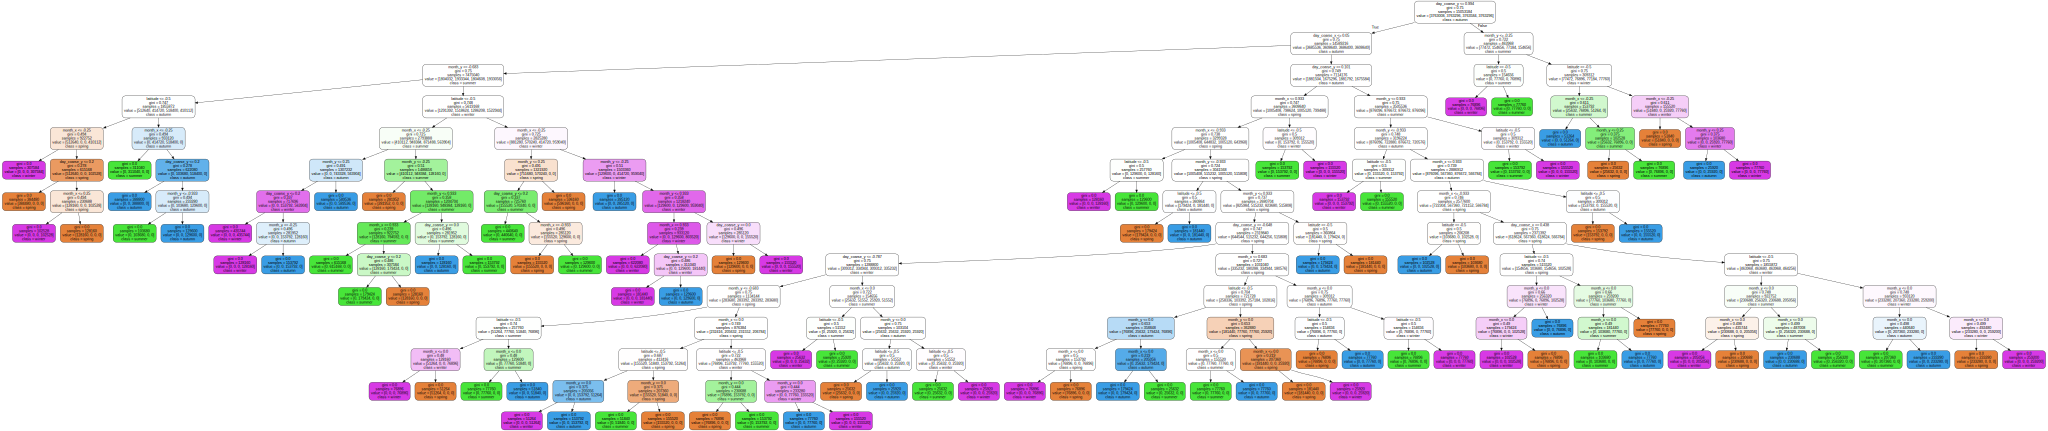

In [44]:
#out_file = Path("./tree_cyclic.png")
out_file = "./tree_cyclic.dot"
export_graphviz(
    tree_clf,
    out_file=out_file,
    feature_names=df_cyclic_train.columns,
    class_names=["spring", "summer", "autumn", "winter"],
    rounded=True,
    filled=True,
)

#!dot -Tpng $(out_file) -o
#from IPython.display import Image
#Image(filename="tree_cyclic.png")
Source.from_file(out_file)

## To Our Surprise!!
The performance actually gets worse when we include the cyclic representation.

## Maybe it's because...
these model are not quite able to separate non-linearly our data points. Let's try a DNN model.